# Assignment 7: Linear regression - model estimation
This assignment introduces you to the estimation of parameters through the minimization of a loss function. We are doing this in the context of linear regression. You will learn to plot the relationship between 2 variables, write a function that makes the model prediction, write a function that calculates the loss function, and how to estimate the parameters of the model. While there are many libraries that implement simple regression, you are learning here a universal way that is applicable to ANY mathematical model. 

The data set possum.csv is a sample of 46 possums that were caught in Victoria (NZ) in a field study. 
- age:  Age (years).
- headL:  Head length, in mm.
- skullW:  Skull width, in mm.
- totalL:  Total length, in cm.
- tailL:  Tail length, in cm.


## Preliminaries

In [1]:
import matplotlib
import matplotlib.pyplot as plt 
import scipy.optimize as so
import pandas as pd 
import numpy as np

## Task 1: Scatterplots
### Question 1.1 (8pts)
Make a scatter plot between age and head size. Make sure to label your x-axis and y-axis. Written answer: is there a relationship between the two variables? How would you describe it qualitatively (is the relationship positive or negative, is it linear, etc)? 

Text(0, 0.5, 'head length')

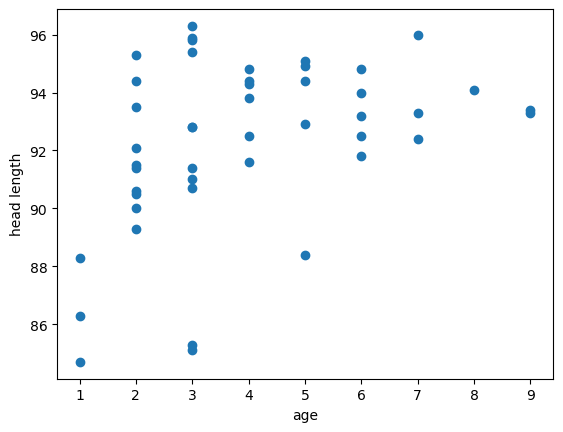

In [2]:
df = pd.read_csv("possum.csv")

plt.scatter(df["age"], df["headL"])
plt.xlabel('age')
plt.ylabel('head length')

Figure 1. Scatterplot of possum age and head length.

Written answer: There looks to be a small relationship between the variables. As age increase, so does headsize. However, this relationship is minimal. To descibe it qualitatively it is a weak positive linear relation.

### Question 1.2 (8pts)
Make a scatter plot between head size and skull width. Written answer: is there a relationship between the two variables? How would you describe it qualitatively? Are there unusual data points (i.e. outliers) in the data set? What may be a possible explanation?    

Text(0, 0.5, 'skull width')

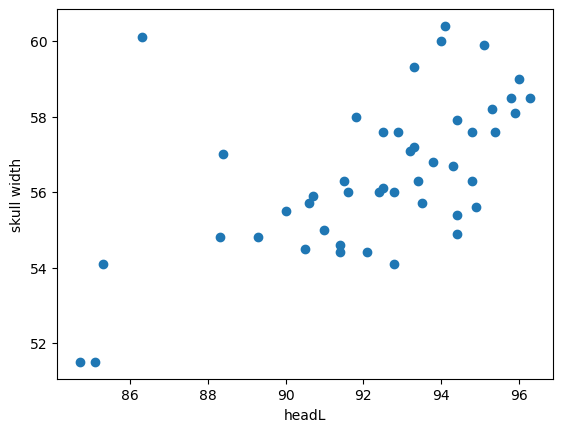

In [3]:
plt.scatter(df["headL"], df["skullW"])
plt.xlabel('headL')
plt.ylabel('skull width')

Figure 2. Scatter plot of possum head length vs skull width 

Written answer: There is a definite relationship between variables. The relationship is moderate positivly linear. There are however a couple of outliers in the data set. Possible explinations could be random mutation due to genetic variation, or errors when the measurments where taken that were not caught. 

## Task 2 Fit a linear regression line "by hand"
### Question 2.1 (10 pts)
Write a function simpleRegPredict(b,x) that takes as an input b a list of two parameter [intercept,slope] and as x values of an x-variable. The function should then return the predicted values for y following the linear model (see lecture). Call the function using b=[83,2] as parameters and to predict the value for x=2. 


In [4]:
def simpleRegPredict(b, x):
    
    yPredicted = b[0] + b[1]*x
    return yPredicted

simpleRegPredict([83,2], 2)

87

### Question 2.2 (10pts)
Write a function plotPrediction(b,x,y,fcn=simpleRegPredict) that makes a scatter plot of the x vs. the y-variable and then plots a regression line into the plot (see lecture / lab for hints). Call the function for x being the age, y=headL, and b=[83,2].

Text(0, 0.5, 'head length')

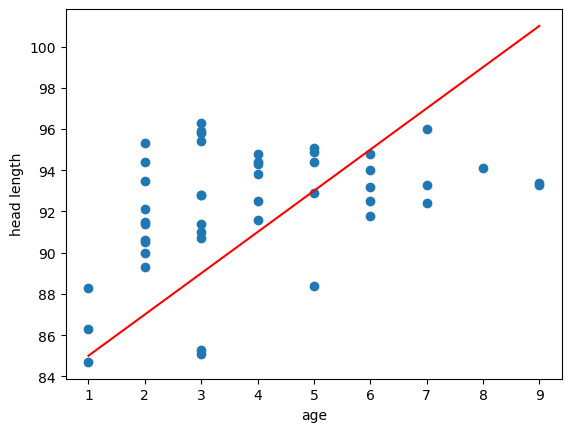

In [5]:
def plotPrediction(b,x,y,fcn = simpleRegPredict):
    plt.scatter(x, y)
    
    xPredict = np.linspace(min(x), max(x), num = len(x))
    
    plt.plot(xPredict, fcn(b, xPredict), color = 'red')
    
plotPrediction(b = [83,2], x = df["age"], y = df["headL"], fcn = simpleRegPredict) 
plt.xlabel('age')
plt.ylabel('head length')

Figure 3. Scatter plot of possum age vs head length. Red line is plotted with an slope of 2 and intercept of 83.

### Question 2.3 (10pts)
Write a loss function simpleRegLossRSS(b,x,y) that takes as the inputs the parameters (b), the explanatory (x) and the response variable (y) and then calculates and returns the residual sum-of-squares of the linear fit. It also should return the derivate of the Loss function in respect to the two parameters (see lecture / lab). The function should use your function simpleRegPred. Call the function with b=[83,2] as parameters, x=age and y= headL. What is the residual sum of squares? What is the derivative? In order to minimize the Loss, would you need to increase or decrease the slope/intercept? 

In [6]:
def simpleRegLossRSS(b, x, y):
    
    yPredict = simpleRegPredict(b, x)

    # calculate the residuals (difference between the real and predicted y values)
    res = y - yPredict
    rss = res**2
    loss = np.sum(rss)

    # calculate the derivatives with respect to each parameter (regression coefficient)
    db0 = np.sum(-2*(res))
    db1 = np.sum(-2*x*res)
    
    #dloss/db
    deriv = [db0, db1]
    
    return loss, deriv

loss, deriv = simpleRegLossRSS(b = [83,2], x = df["age"], y = df['headL'])
print("The residual sum of squares (loss) is", loss)
print("The derivatives for b0 and b1 repectively are", deriv)

The residual sum of squares (loss) is 818.39
The derivatives for b0 and b1 repectively are [-128.6, 54.19999999999993]


Using the original b [83,2] as a reference point the b0 (intercept) would need to increase and the b1 (slope) would need to decrease.

### Question 2.4 (10pts)
First try to reduce the slope value and try parameter values b=[83,0.6]. Then increase the intercept and try b=[89,0.6]. For each value make the prediction plot and report the residual-sum-of squares using your functions from question 2 and 3. Which fit provides the lowest loss (rss)? How do the derivatives change for each value? And according to the derivative, which direction should you change the parameters? Play around with other parameter settings. Can you find one that gives you a loss below rss=350? 

The residual sum of squares (loss) is 2537.87
The derivatives for b0 and b1 repectively are [-638.1999999999999, -2510.6]


Text(0, 0.5, 'head length')

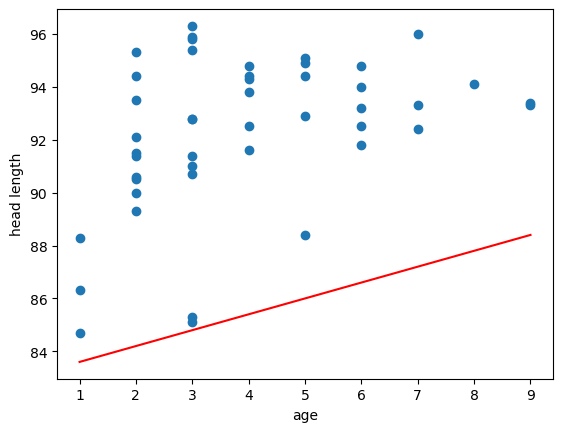

In [7]:
plotPrediction(b = [83,0.6], x = df["age"], y = df["headL"], fcn = simpleRegPredict)    

loss, deriv = simpleRegLossRSS(b = [83,0.6], x = df["age"], y = df['headL'])
print("The residual sum of squares (loss) is", loss)
print("The derivatives for b0 and b1 repectively are", deriv)
plt.xlabel('age')
plt.ylabel('head length')

Figure 4. Scatter plot of possum age vs head length. Red line is plotted with an slope of 0.6 and intercept of 83.

The residual sum of squares (loss) is 364.66999999999985
The derivatives for b0 and b1 repectively are [-86.19999999999999, -326.5999999999999]


Text(0, 0.5, 'head length')

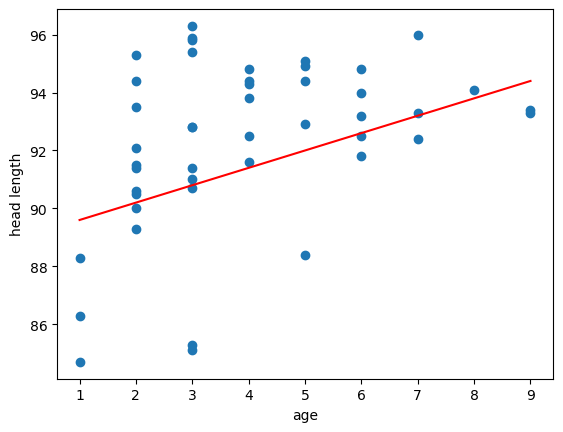

In [8]:
plotPrediction(b = [89,0.6], x = df["age"], y = df["headL"], fcn = simpleRegPredict)    

loss, deriv = simpleRegLossRSS(b = [89,0.6], x = df["age"], y = df['headL'])
print("The residual sum of squares (loss) is", loss)
print("The derivatives for b0 and b1 repectively are", deriv)
plt.xlabel('age')
plt.ylabel('head length')

Figure 5. Scatter plot of possum age vs head length. Red line is plotted with an slope of 0.6 and intercept of 89.

**Writtern:** Which fit provides the lowest loss (rss)? How do the derivatives change for each value? And according to the derivative, which direction should you change the parameters?

The [89,0.6] provides a much lower rss than [83,0.6]. The derivitives for [89,0.6] are much closer to 0 than [83,0.6], so because they were more negative for [83,0.6] the values had to increase making them closer to 0. Both the intercept and slope should increase to get the lowest rss as they are both still negative.

The residual sum of squares (loss) is 324.67535
The derivatives for b0 and b1 repectively are [-4.839999999999833, 1.1800000000003479]


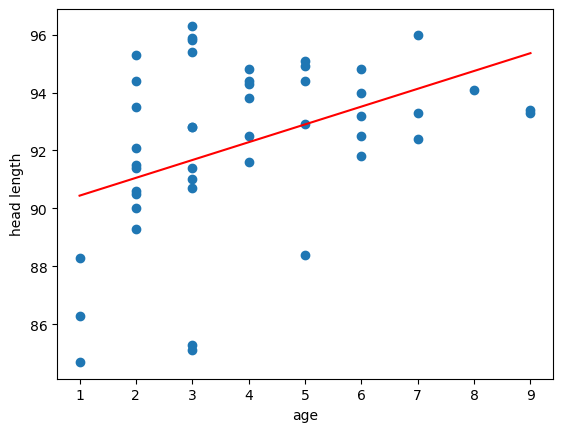

In [9]:
plotPrediction(b = [89.825,0.615], x = df["age"], y = df["headL"], fcn = simpleRegPredict)    
plt.xlabel('age')
plt.ylabel('head length')
loss, deriv = simpleRegLossRSS(b = [89.825,0.615], x = df["age"], y = df['headL'])
print("The residual sum of squares (loss) is", loss)
print("The derivatives for b0 and b1 repectively are", deriv) 

# 90,0.7 == 337 (+,+)
# 89.5,0.65 == 328 (-,-)
# 89.7,0.66 == 325 (0,+)
# 89.78, 0.62 == 324.9(-,-)
# 89.825, 0.615 == 324.6 (-,+)

Figure 6. Scatter plot of possum age vs head length. Red line is plotted with an slope of 0.615 and intercept of 89.825

## Task 3: Fit the linear model using scipy.optimize.minimize
### Question 3.1 (10pts)
Use scipy.optimize.minimize to minimize the function value of simpleRegLossRSS(b,x,y) from task 2, question 2. As starting values simply give b0=[0,0]
Show the result structure. Written answer: What is the estimated parameter value for intercept and slope and what is the best achieved rss? 

In [10]:
x = df["age"]
y = df["headL"]
b0 = [0,0]
result = so.minimize(simpleRegLossRSS, b0, args=(x, y), jac=True)
result

      fun: 324.02064580559266
 hess_inv: array([[ 0.05082114, -0.01009765],
       [-0.01009765,  0.00255215]])
      jac: array([-3.89377419e-12, -3.00417469e-11])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 7
     njev: 9
   status: 0
  success: True
        x: array([90.08288948,  0.56311585])

Written: The best estimated parameter for intercept is 90.08288948 and for slope 0.56311585. This will provide the best possible rss of 324.0206458055926. (I got pretty close with my rss of 324.6)

### Question 3.2 (8pts)
Use your function plotPrediction (from above) to plot this best linear fit between age and head length. 

Text(0, 0.5, 'head length')

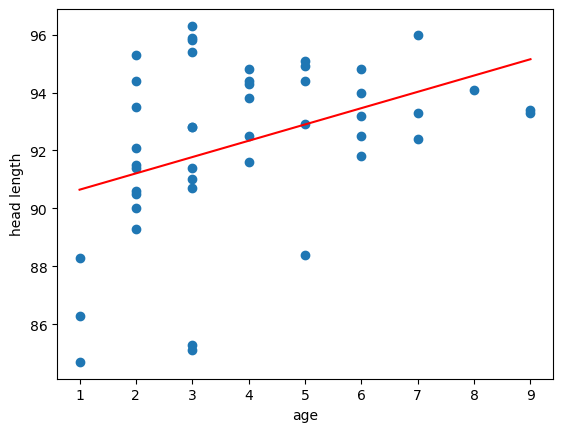

In [11]:
plotPrediction(b = [90.08288948,  0.56311585], x = df["age"], y = df["headL"], fcn = simpleRegPredict)  
plt.xlabel('age')
plt.ylabel('head length')

Figure 7. Scatter plot of possum age vs head length. Red line is plotted with an slope of 0.56311585 and intercept of 90.08288948

### Question 3.3 (8pts)
Calculate the **total** sum-of-squares by subtracting the mean from all the y-values, squaring the result and finally summing them up. What is the total sum of squares for headL? 

In [12]:
TSS = sum((y - np.mean(y))**2)
print('The TSS value is %f' % TSS)

The TSS value is 386.144565


### Question 3.4 (10pts)
Write a function simpleRegFit(x,y) that (a) estimates the parameters as done in Question 3.1, (b) plots the predictions as done in 3.2 and (c) calculates (and returns) R2 of the fit.  Call the function with x=age and y=headL.  Written answer: What is the R2 of the fit? How can you interpret it? 

The R2 of the fit is 0.16088254246650924


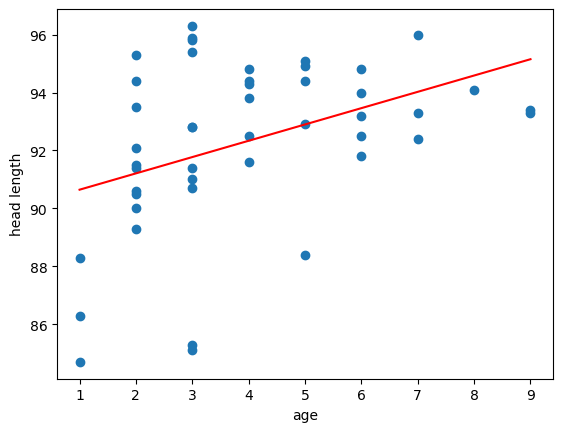

In [13]:
def simpleRegFit(x, y):
    b0 = [0,0]
    
    result = so.minimize(simpleRegLossRSS, b0, args=(x, y), jac=True)
    
    b = result.x
    plotPrediction(b, x, y, fcn = simpleRegPredict)
    
    TSS = sum((y - np.mean(y))**2)
    
    yPredict = b[0] + b[1]*x
    res = y - yPredict
    rss = res**2
    loss = np.sum(rss)
    
    R2 = 1 - (loss/TSS)

    return R2, b

R2, b = simpleRegFit(df["age"], df["headL"])
plt.xlabel('age')
plt.ylabel('head length')
print("The R2 of the fit is", R2)

Figure 8. Scatter plot of possum age vs head length. Red line is plotted with the optimal slope and intercept for the fit (line of best fit). 

Written: The quality of the fit is pretty poor as the R2 value is low. It tells us what percent of variability in the response variable is explained by the model.

### Question 3.5 (8pts)
Fit a linear model between age (x) and tail length (y). How good is the fit? Are there outliers? How much would the slope of the line change if you excluded the outlier?  

The R2 of the fit is 0.22286587947604086


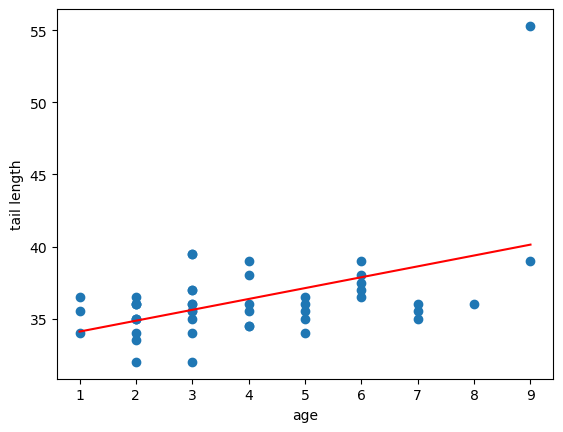

In [14]:
R2, b = simpleRegFit(df["age"], df["tailL"])
plt.xlabel('age')
plt.ylabel('tail length')
print("The R2 of the fit is", R2)

Figure 9. Scatter plot of age vs tail length. Red line is plotted with the optimal slope and intercept for the fit (line of best fit). 

The R2 of the fit is 0.16670814192759442


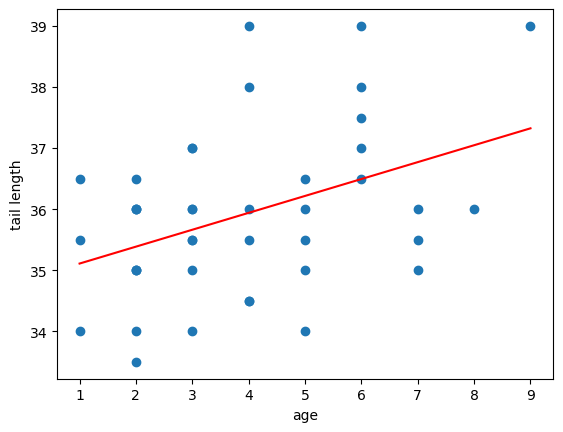

In [15]:
#OUTLIER EXCLUSION

df2 = df

q75 = np.percentile(df2['tailL'], 75, interpolation = 'midpoint')
q25 = np.percentile(df2['tailL'], 25, interpolation = 'midpoint')

IQR = q75 - q25
upper = q75 +1.5*IQR
lower = q25 - 1.5*IQR

upper_array=np.array(df2['tailL'] >= upper)

b = list(upper_array)

lower_array=np.array(df2['tailL'] <= lower)

c = list(lower_array)

for i in range(len(b)):
    if b[i] == True:
        df2.drop(i, inplace = True)
        
for i in range(len(c)):
    if c[i] == True:
        df2.drop(i, inplace = True)

R2, b = simpleRegFit(df["age"], df["tailL"])
plt.xlabel('age')
plt.ylabel('tail length')
print("The R2 of the fit is", R2)


Figure 10. Scatter plot of possum age vs tail length after all ourliers were removed. Red line is plotted with the optimal slope and intercept for the fit (line of best fit). 

Written: The fit is not super good, only having an R2 value of 0.22. My orginal thoughts were that removing the outliers whould have a positive effect on the rss as using the sum of squares method large outliers count relatively more than small errors. However, once the errors were removed the data appears more spread out and so the line does not fit as nicely. The R2 value was decreased to 0.16.